## Step 4: Data Modeling
<br>

> **By: Sana Shaikh & Omkar Patil**

### Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
model_data = pd.read_csv("/kaggle/input/mp-feature-selection/fs_data.csv")
model_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,abroad,contact_with_covid_object,contact_with_covid_patient,corona_result
0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0


In [3]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cough                       42916 non-null  int64
 1   fever                       42916 non-null  int64
 2   sore_throat                 42916 non-null  int64
 3   shortness_of_breath         42916 non-null  int64
 4   head_ache                   42916 non-null  int64
 5   age_60_and_above            42916 non-null  int64
 6   abroad                      42916 non-null  int64
 7   contact_with_covid_object   42916 non-null  int64
 8   contact_with_covid_patient  42916 non-null  int64
 9   corona_result               42916 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


### Data Modeling

> *Data Partition (70:30 split)*

In [4]:
x = model_data.drop(['corona_result'],axis=1)
y = model_data['corona_result']

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [5]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [6]:
X_train = pd.read_csv("./X_train.csv")
X_test = pd.read_csv("./X_test.csv")
y_train = pd.read_csv("./y_train.csv")
y_test = pd.read_csv("./y_test.csv")

#### Evaluation Metric Function

In [7]:
def eval_metr(y_pred):
  cm1 = confusion_matrix(y_test,y_pred)
  unique_label = np.unique([y_test, y_pred])
  cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
  )
  print(cmtx)
  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('\nSpecificity : ', specificity1)
  recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
  print("\nRecall: ",recall)
  precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
  print('\nPrecision : ', precision)
  accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
  print('\nAccuracy : ', accuracy)

#### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.31      0.41      5958
           1       0.57      0.80      0.67      6917

    accuracy                           0.57     12875
   macro avg       0.57      0.56      0.54     12875
weighted avg       0.57      0.57      0.55     12875



In [9]:
eval_metr(pd.DataFrame(y_pred))

        pred:0  pred:1
true:0    1876    4082
true:1    1402    5515

Specificity :  0.3148707620006714

Recall:  0.7973109729651583

Precision :  0.5746587475252684

Accuracy :  0.5740582524271844


cough, Score: 0.02868
fever, Score: 0.08393
sore_throat, Score: 0.32644
shortness_of_breath, Score: 0.56723
head_ache, Score: 0.26678
age_60_and_above, Score: 0.38507
abroad, Score: -0.69192
contact_with_covid_object, Score: 0.19040
contact_with_covid_patient, Score: 0.12162


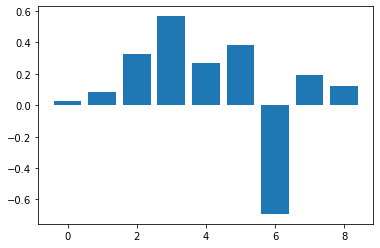

In [10]:
from matplotlib import pyplot
li = list(X_train.columns)
importance = logistic_regression.coef_[0]
for i,v in enumerate(importance):
    print('%s, Score: %.5f' % (li[i],v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.61      0.17      0.27      5958
           1       0.56      0.90      0.69      6917

    accuracy                           0.57     12875
   macro avg       0.58      0.54      0.48     12875
weighted avg       0.58      0.57      0.50     12875



In [12]:
eval_metr(pd.DataFrame(gnb_pred))

        pred:0  pred:1
true:0    1023    4935
true:1     658    6259

Specificity :  0.1717019133937563

Recall:  0.9048720543588261

Precision :  0.5591388243701984

Accuracy :  0.5655922330097087


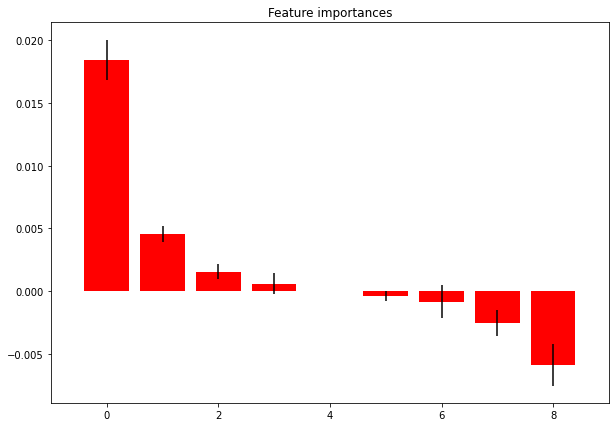

In [13]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xlim([-1, X_test.shape[1]])
plt.show()

#### Random Forest 

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52      5958
           1       0.60      0.66      0.63      6917

    accuracy                           0.58     12875
   macro avg       0.58      0.57      0.57     12875
weighted avg       0.58      0.58      0.58     12875



In [15]:
eval_metr(pd.DataFrame(rfc_pred))

        pred:0  pred:1
true:0    2909    3049
true:1    2345    4572

Specificity :  0.4882510909701242

Recall:  0.6609801937256036

Precision :  0.5999212701745178

Accuracy :  0.5810485436893204


<BarContainer object of 9 artists>

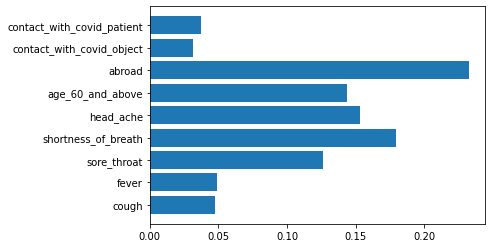

In [16]:
plt.barh(X_train.columns.values.tolist(),rfc.feature_importances_)

#### XGBoost

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=3,random_state=42, objective='binary:logistic', eval_metric= "logloss")
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49      5958
           1       0.59      0.70      0.64      6917

    accuracy                           0.58     12875
   macro avg       0.58      0.57      0.57     12875
weighted avg       0.58      0.58      0.57     12875



In [18]:
eval_metr(pd.DataFrame(xgb_pred))

        pred:0  pred:1
true:0    2620    3338
true:1    2072    4845

Specificity :  0.43974488083249413

Recall:  0.7004481711724736

Precision :  0.5920811438347794

Accuracy :  0.5798058252427184


<BarContainer object of 9 artists>

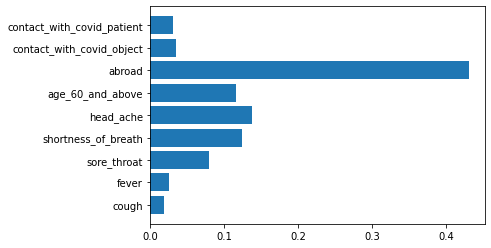

In [19]:
plt.barh(X_train.columns.values.tolist(),xgb.feature_importances_)

### Evaluation Parameters

> ![Formulae](https://raw.githubusercontent.com/mykeysid10/Sem-6-Risk-Prediction-of-Covid-19-Cases/main/Confusion%20Matrix.jpg)
> 1. **Sensitivity (Recall)** : *It is the ability of a test to correctly classify an individual as COVID Positive patient.*
> 2. **Specificity** : *It is the ability of a test to correctly classify an individual as COVID Negative patient.*
> 3. **Precision** :  *It is the ratio of correctly predicted positive observations to the total predicted positive observations.*

### Conclusion

> 
> ![Evaluation Parameters](https://raw.githubusercontent.com/mykeysid10/Sem-6-Risk-Prediction-of-Covid-19-Cases/main/Model-Evaluation-Parameters.png)
> 
> 1. *In this scenerio best model must have type 2 error as low as possible and type 1 error should be low.*
> 2. *XGBoost performs slightly better than other 3 models.*

### Based On the above results Creating a pickle file to save the best model results

In [20]:
# import pickle
# model_path = 'model.pkl'
# model_pickle = open(model_path, 'wb')
# pickle.dump(rfc, model_pickle)
# model_pickle.close()